In [3]:
import pandas as pd
import numpy as np
from sklearn import neighbors, datasets
from matplotlib import pyplot as plt
% matplotlib inline

In [196]:
def smote(dataframe, k):
    # get the labels of input dataframe
    labels = dataframe.iloc[:, -1]
    # extract unique labels and count number of examples for each one
    unq_labels, cnt_labels = np.unique(labels, return_counts=True)
    # detect minor class and major class
    unq_labels = list(unq_labels)
    cnt_labels = list(cnt_labels)
    imbalanced_label = unq_labels.index(cnt_labels.index(min(cnt_labels)))
    max_label = unq_labels.index(cnt_labels.index(max(cnt_labels)))
    # calculate for how many times minor class should be extended to reach major one
    num_imbalanced = min(cnt_labels)
    num_max_label = max(cnt_labels)
    increase_rate = int(num_max_label / num_imbalanced)
    # extract minor class examples
    imbalanced_class = dataframe.loc[dataframe.iloc[:, -1] == 0]
    synth_data = []
    for i in range(num_imbalanced):
        neigh = neighbors.NearestNeighbors(n_neighbors=k + 1)
        neigh.fit(dataframe.iloc[:, :-1], dataframe.iloc[:, -1])
        ind_array = neigh.kneighbors(X=[imbalanced_class.iloc[i, :-1]],return_distance=False)
        new_data = populate(dataframe, imbalanced_class, increase_rate, i, ind_array)
        for j in range(len(new_data)):
            synth_data.append(new_data[j])        
    synth_data = np.array(synth_data)
    synth_data_dataframe = pd.DataFrame(synth_data)
    synth_data_dataframe.columns = dataframe.iloc[:, :-1].columns
    synth_labels = [imbalanced_label for i in range(synth_data_dataframe.shape[0])]
    synth_data_dataframe['label'] = synth_labels
    new_dataframe = pd.concat([dataframe, synth_data_dataframe])
    return new_dataframe
    
def populate(dataframe, imbalanced_class, inc_rate, i, ind_array):
    synth_data = []
    while inc_rate != 0:
        rand_k = int(np.random.random() * len(list(ind_array - 1))) + 1
        new_datapoint = []
        for attr in range(dataframe.iloc[:, :-1].shape[1]):
            dist = float(dataframe.iloc[ind_array[:, rand_k], attr]) - float(imbalanced_class.iloc[i, attr])
            gap = np.random.random()
            new_datapoint.append(imbalanced_class.iloc[i, attr] + gap * dist)
        synth_data.append(new_datapoint)
        inc_rate -= 1
    return synth_data     

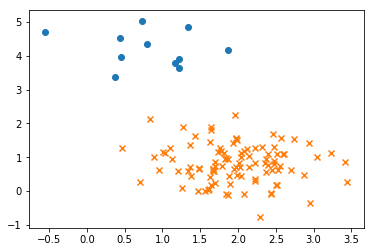

In [197]:
# % cd ./coursework/project/imbalanced_datasets
blobs = pd.read_csv('imbalanced_blobs.csv')
label_0 = blobs.loc[blobs['label'] == 0]
label_1 = blobs.loc[blobs['label'] == 1]
plt.scatter(label_0.x1, label_0.x2, marker='o')
plt.scatter(label_1.x1, label_1.x2, marker='x')

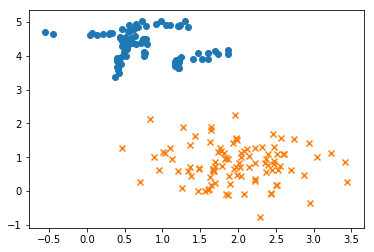

In [204]:
new_blobs = smote(blobs, 5)
label_0 = new_blobs.loc[new_blobs['label'] == 0]
label_1 = new_blobs.loc[new_blobs['label'] == 1]
plt.scatter(label_0.x1, label_0.x2, marker='o')
plt.scatter(label_1.x1, label_1.x2, marker='x')

In [184]:
print 'Number of class 0 after SMOTE:', new_blobs.loc[new_blobs['label'] == 0].shape[0]
print 'Number of class 1 after SMOTE:', new_blobs.loc[new_blobs['label'] == 1].shape[0]

Number of class 0 after SMOTE 110
Number of class 1 after SMOTE 100
